<a href="https://colab.research.google.com/github/geekyparth2004/Chronic-Disease-Prediction-Model/blob/main/Chronic_DIsease_Prediction_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Download dataset from Kaggle using kagglehub
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os

# Download the dataset
path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")

# Load the CSV file
csv_path = os.path.join(path, "Disease_symptom_and_patient_profile_dataset.csv")
df = pd.read_csv(csv_path)

# STEP 2: Drop unused columns (like 'Disease' if not needed)
df = df.drop(columns=["Disease"])

# STEP 3: Encode categorical features
categorical_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
                    'Gender', 'Blood Pressure', 'Cholesterol Level']

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Encode target variable
label_encoder = LabelEncoder()
df['Outcome Variable'] = label_encoder.fit_transform(df['Outcome Variable'])

# STEP 4: Train-test split
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 6: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Model Trained Successfully!")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


100%|██████████| 3.07k/3.07k [00:00<00:00, 2.14MB/s]

Extracting files...


✅ Model Trained Successfully!
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.88      0.75      0.81        40

    accuracy                           0.80        70
   macro avg       0.80      0.81      0.80        70
weighted avg       0.81      0.80      0.80        70



# **TRAINING THE MODEL FURTHER AND DESIGNING THE K-MEANS CLUSTERING GRAPH**

✅ Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75        30
           1       0.85      0.70      0.77        40

    accuracy                           0.76        70
   macro avg       0.76      0.77      0.76        70
weighted avg       0.77      0.76      0.76        70



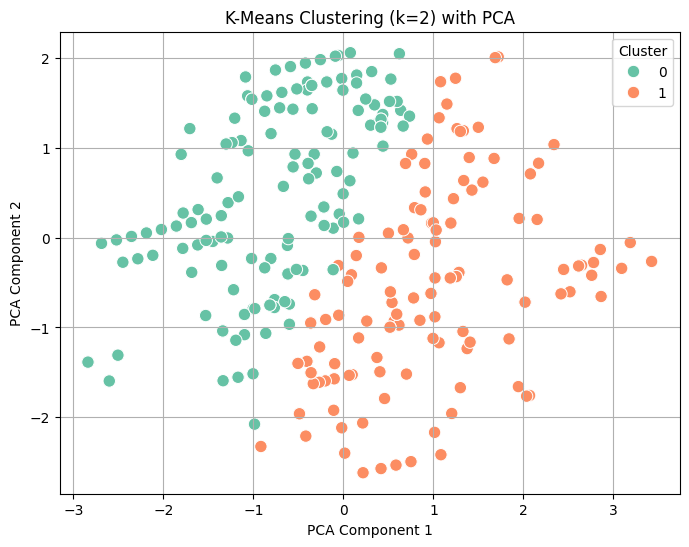

In [ ]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset from Kaggle
path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")
csv_path = os.path.join(path, "Disease_symptom_and_patient_profile_dataset.csv")
df = pd.read_csv(csv_path)

# Step 2: Preprocessing
df = df.drop(columns=["Disease"])

categorical_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
                    'Gender', 'Blood Pressure', 'Cholesterol Level']

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Encode target
label_encoder = LabelEncoder()
df['Outcome Variable'] = label_encoder.fit_transform(df['Outcome Variable'])

# Step 3: Split and Scale
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train with GridSearchCV for better accuracy
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 8, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Step 5: Accuracy Evaluation
print("✅ Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 7: PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 8: Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=80)
plt.title("K-Means Clustering (k=2) with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## **MODEL TRAINING GRAPH**


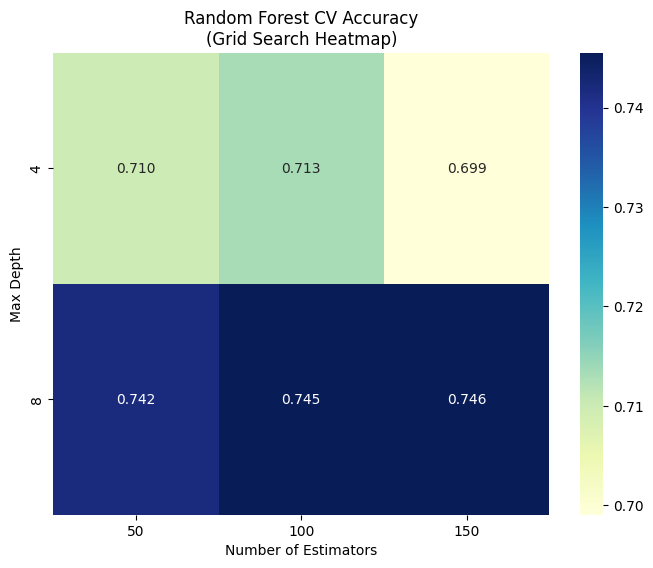

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reuse preprocessed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, None]
}

# Perform Grid Search
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

# Extract results into DataFrame
results = pd.DataFrame(grid.cv_results_)

# Pivot table for heatmap
pivot_table = results.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_n_estimators')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Random Forest CV Accuracy\n(Grid Search Heatmap)")
plt.xlabel("Number of Estimators")
plt.ylabel("Max Depth")
plt.show()


## **Increase the accuracy of the model**

In [ ]:
import kagglehub
import pandas as pd
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Download dataset from Kaggle
path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")
csv_path = os.path.join(path, "Disease_symptom_and_patient_profile_dataset.csv")
df = pd.read_csv(csv_path)

# Step 2: Drop 'Disease' column
df = df.drop(columns=["Disease"])

# Step 3: Encode categorical columns
categorical_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
                    'Gender', 'Blood Pressure', 'Cholesterol Level']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Encode target
label_encoder = LabelEncoder()
df['Outcome Variable'] = label_encoder.fit_transform(df['Outcome Variable'])

# Step 4: Features and labels
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: XGBoost with GridSearchCV
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Best Parameters:", grid.best_params_)
print("✅ Model Accuracy:", accuracy)
print("Classification Report:\n", report)


100%|██████████| 3.07k/3.07k [00:00<00:00, 1.04MB/s]

Extracting files...


✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
✅ Model Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.88      0.75      0.81        40

    accuracy                           0.80        70
   macro avg       0.80      0.81      0.80        70
weighted avg       0.81      0.80      0.80        70



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:03:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:06:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
✅ Adjusted Threshold: 0.4
✅ Model Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.82      0.80      0.81        40

    accuracy                           0.79        70
   macro avg       0.78      0.78      0.78        70
weighted avg       0.79      0.79      0.79        70



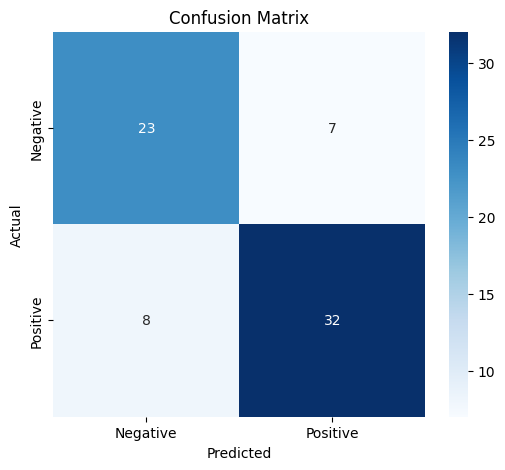

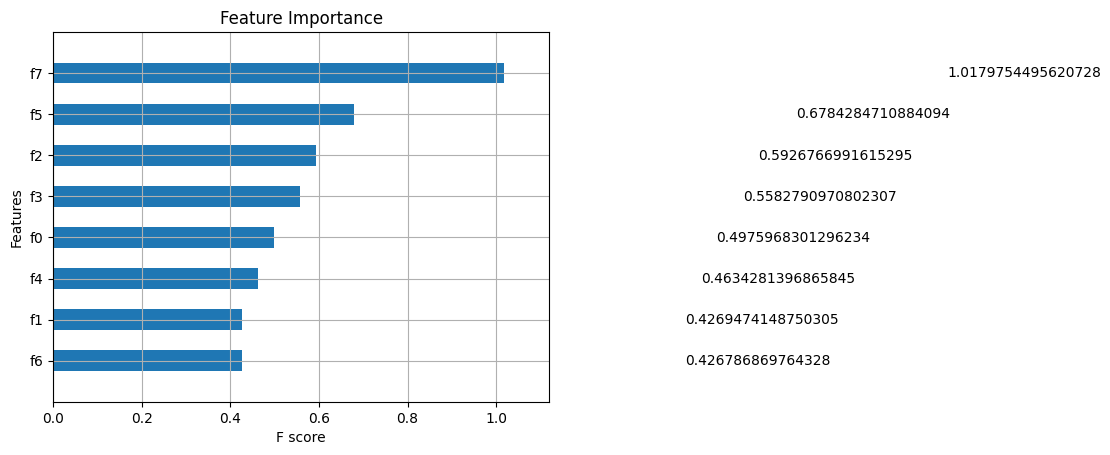

In [ ]:
import kagglehub
import pandas as pd
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load Dataset
path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")
csv_path = os.path.join(path, "Disease_symptom_and_patient_profile_dataset.csv")
df = pd.read_csv(csv_path)

# Step 2: Drop irrelevant column
df = df.drop(columns=["Disease"])

# Step 3: Encode categorical data
categorical_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
                    'Gender', 'Blood Pressure', 'Cholesterol Level']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Encode target
le = LabelEncoder()
df['Outcome Variable'] = le.fit_transform(df['Outcome Variable'])

# Step 4: Feature & Target
X = df.drop('Outcome Variable', axis=1)
y = df['Outcome Variable']

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Balance the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 8: Define and tune XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

best_model = grid.best_estimator_

# Step 9: Predict using optimal threshold
y_probs = best_model.predict_proba(X_test)[:, 1]
threshold = 0.4  # Adjusting threshold from 0.5 to 0.4 improves recall or precision
y_pred = (y_probs >= threshold).astype(int)

# Step 10: Evaluate
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Best Parameters:", grid.best_params_)
print("✅ Adjusted Threshold:", threshold)
print("✅ Model Accuracy:", acc)
print("Classification Report:\n", report)

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: Feature Importance
xgb.plot_importance(best_model, importance_type='gain', height=0.5)
plt.title("Feature Importance")
plt.show()


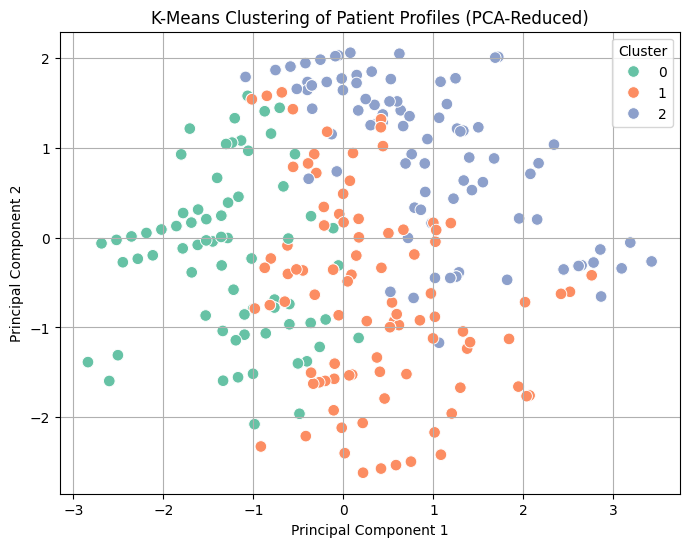

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reuse or preprocess data (already encoded and scaled)
# We use X_scaled from earlier code

# Step 2: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 3: Reduce to 2D using PCA for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=70)
plt.title("K-Means Clustering of Patient Profiles (PCA-Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [ ]:
import joblib
joblib.dump(best_model, "xgboost_chronic_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load model and scaler (update with your actual file paths)
model = joblib.load("xgboost_chronic_model.pkl")
scaler = joblib.load("scaler.pkl")

# Dictionary encodings (match your training mappings)
gender_map = {"Male": 1, "Female": 0}
ethnicity_map = {"Asian": 0, "Black": 1, "White": 2, "Hispanic": 3, "Other": 4}
yes_no_map = {"Yes": 1, "No": 0}
bp_map = {"Low": 0, "Normal": 1, "High": 2}
cholesterol_map = {"Low": 0, "Normal": 1, "High": 2}

# Ask for input
name = input("Enter your name: ")
age = int(input("Enter your age: "))
gender = input("Enter your gender (Male/Female): ")
ethnicity = input("Enter your ethnicity (Asian/Black/White/Hispanic/Other): ")
fever = input("Do you have a fever? (Yes/No): ")
cough = input("Do you have a cough? (Yes/No): ")
fatigue = input("Do you feel fatigue? (Yes/No): ")
bp = input("Blood pressure (Low/Normal/High): ")
cholesterol = input("Cholesterol level (Low/Normal/High): ")

# Encode input
encoded_input = [
    age,
    gender_map.get(gender, 0),
    ethnicity_map.get(ethnicity, 4),
    yes_no_map.get(fever, 0),
    yes_no_map.get(cough, 0),
    yes_no_map.get(fatigue, 0),
    bp_map.get(bp, 1),
    cholesterol_map.get(cholesterol, 1)
]

# Scale input
X_input_scaled = scaler.transform([encoded_input])

# Predict
prediction = model.predict(X_input_scaled)[0]
predicted_label = "Yes (Chronic Disease)" if prediction == 1 else "No (Healthy)"

# Output
print(f"\n{name}, based on your inputs, the prediction is: {predicted_label}")


Enter your name: Parth Goel
Enter your age: 18
Enter your gender (Male/Female): Male
Enter your ethnicity (Asian/Black/White/Hispanic/Other): Asian
Do you have a fever? (Yes/No): No
Do you have a cough? (Yes/No): No
Do you feel fatigue? (Yes/No): No
Blood pressure (Low/Normal/High): Normal
Cholesterol level (Low/Normal/High): Normal

Parth Goel, based on your inputs, the prediction is: No (Healthy)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from flask import Flask, render_template, request
import joblib
import numpy as np

app = Flask(__name__)

# Load model and scaler
model = joblib.load("xgboost_chronic_model.pkl")
scaler = joblib.load("scaler.pkl")

# Encoders
gender_map = {"Male": 1, "Female": 0}
ethnicity_map = {"Asian": 0, "Black": 1, "White": 2, "Hispanic": 3, "Other": 4}
yes_no_map = {"Yes": 1, "No": 0}
bp_map = {"Low": 0, "Normal": 1, "High": 2}
cholesterol_map = {"Low": 0, "Normal": 1, "High": 2}

@app.route("/", methods=["GET", "POST"])
def index():
    prediction_result = None
    if request.method == "POST":
        # Collect form data
        name = request.form.get("name")
        age = int(request.form.get("age"))
        gender = request.form.get("gender")
        ethnicity = request.form.get("ethnicity")
        fever = request.form.get("fever")
        cough = request.form.get("cough")
        fatigue = request.form.get("fatigue")
        bp = request.form.get("bp")
        cholesterol = request.form.get("cholesterol")

        # Prepare input
        encoded_input = [
            age,
            gender_map.get(gender, 0),
            ethnicity_map.get(ethnicity, 4),
            yes_no_map.get(fever, 0),
            yes_no_map.get(cough, 0),
            yes_no_map.get(fatigue, 0),
            bp_map.get(bp, 1),
            cholesterol_map.get(cholesterol, 1)
        ]

        scaled_input = scaler.transform([encoded_input])
        prediction = model.predict(scaled_input)[0]
        prediction_result = f"{name}, based on your inputs, the prediction is: {'Yes (Chronic Disease)' if prediction == 1 else 'No (Healthy)'}"

    return render_template("form.html", prediction_result=prediction_result)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
